In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml #datasets sao conjuntos de dados ja prontos para projetos de machine learn

In [2]:
mnist = fetch_openml('mnist_784', version=1)

c:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x, y = mnist['data'].values, mnist['target'].values
y = y.astype(float)

In [5]:
x # recebe a imagem distribuida em pixel num vetor

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y # recebe qual o numero real descrito na imagem 

array([5., 0., 4., ..., 4., 5., 6.])

5.0


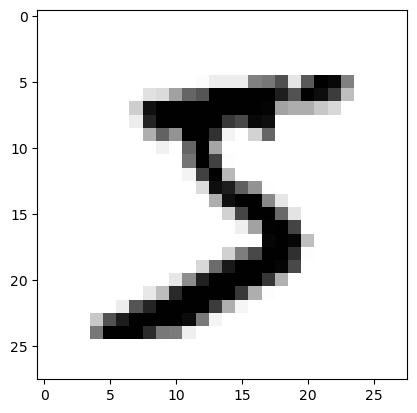

In [7]:
n = 0

plt.imshow(x[n].reshape(28,28), cmap='binary') # plota e primeira imagem 
print(y[n])                                    # printa o primeiro numero
plt.show()

Classificador binário

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) # 70% dos valores para treino e 30% para teste 

In [9]:
y_train_5 = (y_train == 5) # separando parte dos dados para alimentar os valores corretos, para ensinar a detectar quando for 5

In [10]:
y_train_5

array([False,  True, False, ..., False, False, False])

In [11]:
pd.Series(y_train_5).value_counts()

False    44619
True      4381
dtype: int64

In [12]:
from sklearn.linear_model import SGDClassifier #um classificador linear que usa a tecnica SGDC - stocastic gaussian descending

In [13]:
sgd_clf = SGDClassifier()                                # instancia o classificador 
sgd_clf.fit(x_train,y_train_5)                           #fit = aprenda, usando os dados x_train, preveja y_train_5

SGDClassifier()

Classe real:  False
Classe predita pelo modelo:  [False]


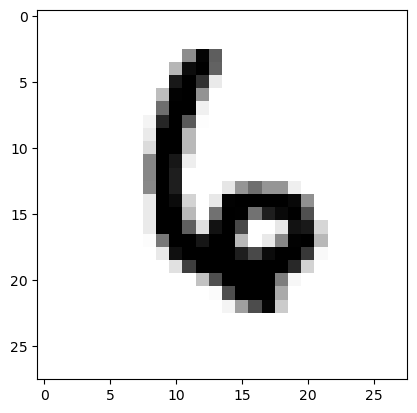

In [14]:
n = 7

plt.imshow(x_train[n].reshape(28,28), cmap='binary')

print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo: ", sgd_clf.predict([x_train[n]]))

In [15]:
from sklearn.model_selection import cross_val_score # calcula a acuracia do modelo

cross_val_score(sgd_clf,x_train,y_train_5,cv=5, scoring='accuracy' ) #cv é quantas fold's ou seja quantas quebras de dados eles vai fazer


array([0.95816327, 0.95959184, 0.93846939, 0.96153061, 0.95918367])

Matriz de confusão

In [16]:
from sklearn.metrics import confusion_matrix # somente para modelos de classificação

In [17]:
confusion_matrix(y_train_5,sgd_clf.predict(x_train))

# previsto[false, true],
# atual   [false, true]

array([[44511,   108],
       [ 2305,  2076]], dtype=int64)

In [18]:
# precisao é o grau de acerto do modelo = tp/(tp+fp)
#recall é o quanto o modelo acertou por todos que ele poderia acertar = tp/(tp+fn)

#é importante saber essa diferenca pois em determinados modelos não é tao importante que ele deixei de acertar desde que isso nao influencie em uma tomada de decisao

# f1 score média harmonica, afim de observar uma equilibrio entre os dois = 2*pres*recal/pres+recal

In [19]:
from sklearn.metrics import precision_score, recall_score

y_train_pred = sgd_clf.predict(x_train)

print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.9505494505494505
Recall:  0.4738644145172335


In [20]:
from sklearn.metrics import classification_report

In [21]:
print(confusion_matrix(y_train_5,sgd_clf.predict(x_train)))
print(classification_report(y_train_5,sgd_clf.predict(x_train)))

[[44511   108]
 [ 2305  2076]]
              precision    recall  f1-score   support

       False       0.95      1.00      0.97     44619
        True       0.95      0.47      0.63      4381

    accuracy                           0.95     49000
   macro avg       0.95      0.74      0.80     49000
weighted avg       0.95      0.95      0.94     49000



In [22]:
sgd_clf.fit(x_train,y_train)

SGDClassifier()

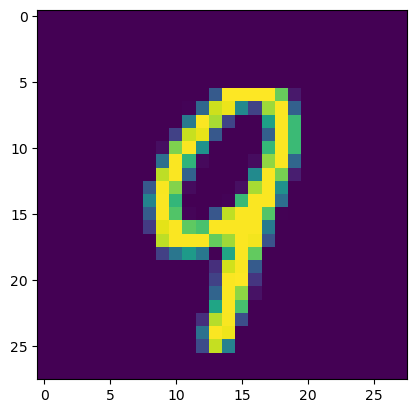

In [30]:
n = 3

digit = x_train[n]

plt.imshow(digit.reshape(28,28))

In [31]:
sgd_clf.predict([digit])

array([9.])

In [32]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,x_train,y_train, cv=3)

In [34]:
conf_mx = confusion_matrix(y_train,y_train_pred)


print(conf_mx)
print(classification_report(y_train,y_train_pred))

[[4529    0   54   17   10   24   39    3   94   30]
 [   1 5215   76   24   10   29    6   11   90   15]
 [  37   36 4400   75   41   13   62   39  126   22]
 [  18   18  311 4226   15   98   17   36  147  137]
 [  22   19   42   14 4280    5   23   11   96  292]
 [  68   15   87  252   77 3071   69   18  508  216]
 [  40   14  143    6   39   78 4392    1  136   12]
 [  22   18  110   23  105   17    3 4225   91  480]
 [  32   69  286  150   56   64   14   23 3869  283]
 [  16   12   29   60  278   22    0   89   82 4275]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      4800
         1.0       0.96      0.95      0.96      5477
         2.0       0.79      0.91      0.85      4851
         3.0       0.87      0.84      0.86      5023
         4.0       0.87      0.89      0.88      4804
         5.0       0.90      0.70      0.79      4381
         6.0       0.95      0.90      0.93      4861
         7.0       0.95      0.83   

<Axes: >

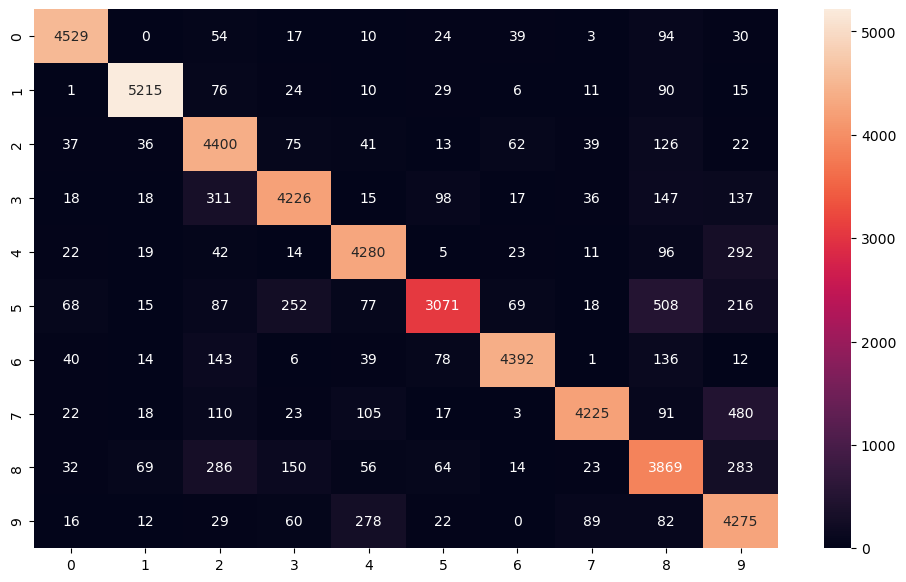

In [38]:
fig, ax = plt.subplots(figsize=(12,7))

sns.heatmap(conf_mx, annot=True, fmt='.0f')


In [39]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train %2 == 1)

y_multilabel = np.c_[y_train_large,y_train_odd]

In [40]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

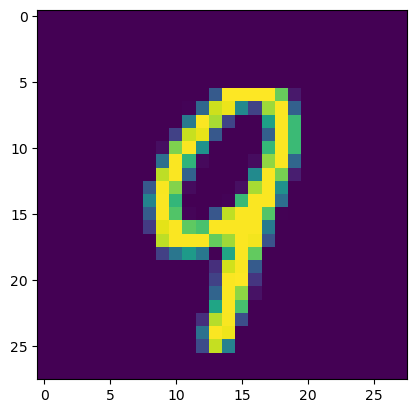

In [41]:
n = 3

digit = x_train[n]

plt.imshow(digit.reshape(28,28))

In [42]:
knn_clf.predict([digit])

array([[ True,  True]])